In [1]:
from getdist import plots,loadMCSamples
import matplotlib.pyplot as plt
plt.style.use('Minh_paper_style')
import matplotlib
import matplotlib.cm
from matplotlib.ticker import (FixedLocator, MultipleLocator, FixedFormatter, FormatStrFormatter,
                               AutoMinorLocator)

fig_path=r'/cobra/u/minh/Beyond2ptMock/results/figs/'
analysis_settings_default = {'ignore_rows': '0.3', 'converge_test_limit': '0.95'}
analysis_settings_alternative = {'ignore_rows': '0.3', 'converge_test_limit': '0.95', 'smooth_scale_1D': '0.5', 'smooth_scale_2D': '0.7'}
analysis_settings=[analysis_settings_default,analysis_settings_alternative]
g=plots.get_single_plotter(analysis_settings=analysis_settings_default)
g.settings.figure_legend_frame = False
g.settings.legend_colored_text = True
g.settings.alpha_filled_add=1.0
g.settings.norm_1d_density=True
g.settings.title_limit_fontsize=24
g.settings.legend_fontsize=18
g.settings.legend_frame=False
g.settings.legend_frac_subplot_margin=0.0
g.settings.axes_fontsize=18
g.settings.axes_labelsize=18
cmap=matplotlib.cm.get_cmap('viridis')
g.settings.colormap_scatter=cmap
redpink='#f1006d'

<Figure size 600x450 with 0 Axes>

In [2]:
chain_param_path='/cobra/ptmp/minh/lefty_challenge/flatLCDM/box1/sampling_bO/Eulerian_NUFFT/twolptthird_nufft/kmax015/'
chain_prefix=['chain1/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.21_cube_logP_params','chain1/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.21_cube_logP_params']

fixedic_chains=[]
#for chain in chain_prefix:
    #fixedic_chains.append(loadMCSamples(chain_param_path+chain,settings=analysis_settings));
fixedic_chains.append(loadMCSamples(chain_param_path+chain_prefix[0],settings=analysis_settings[0]));
fixedic_chains.append(loadMCSamples(chain_param_path+chain_prefix[1],settings=analysis_settings[1]));

/cobra/ptmp/minh/lefty_challenge/flatLCDM/box1/sampling_bO/Eulerian_NUFFT/twolptthird_nufft/kmax015/chain1/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.21_cube_logP_params.1.txt
/cobra/ptmp/minh/lefty_challenge/flatLCDM/box1/sampling_bO/Eulerian_NUFFT/twolptthird_nufft/kmax015/chain1/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.21_cube_logP_params.2.txt
Removed 0.3 as burn in


In [8]:
convergence_test=fixedic_chains[0].getConvergeTests(feedback=True)

Number of chains used =  2
 var(mean)/mean(var), remaining chains, worst e-value: R-1 =       0.06949
RL: Thin for Markov:  7
RL: Thin for indep samples:   62
RL: Estimated burn in steps:  264  ( 264  rows)


In [7]:
print(convergence_test)

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

                Weight Length   Sample length           N_eff
alpha                2.13E+01           21.26             310
b_K2                 3.41E+01           34.07             193
b_K3                 9.93E-01            0.99            6653
b_Otd                9.99E-01            1.00            6613
b_delta              2.25E+01           22.53             293
b_delta              9.90E-01            0.99            6677
b_delta^2            3.04E+01           30.39             217
b_delta^3            9.82E-01            0.98            6729
b_lapl(delta)        9.92E-01            0.99            6664
sigma                1.00E+00            1.00            6609


mean convergence stats using remaining chains
param sqrt(var(chain mean)/mean(chain var))

alpha             0.0083  \alpha
b_K2              0.1502  b_{K^2}
b_K3              0.1159  b_{K^3}
b_Otd             0.0383  

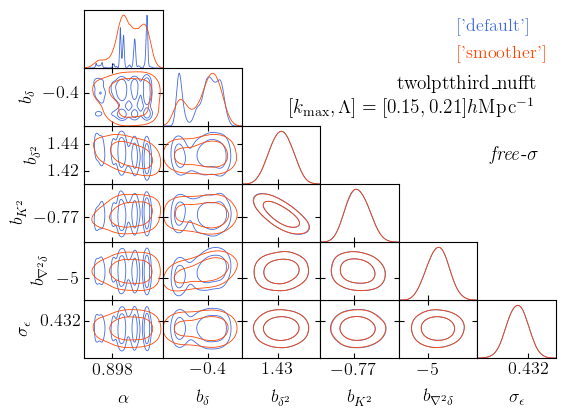

In [46]:
param_list = ['alpha','b_delta','b_delta^2','b_K2','b_lapl(delta)','sigma']
#param_list = ['alpha','b_delta','b_delta2','b_K2','b_lapl_delta','sigma']
#labels=['$\hat{s}=\hat{s}_{\mathrm{true}}$','Free $\hat{s}$']
#g.triangle_plot([fixedic_chains,freeic_trueicinit_chains],contour_colors=['royalblue','orangered'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=0.25)
#labels=['seed\,\#1','seed\,\#2']
labels=[['default'],[r'smoother']]
contour_colors=[['orangered'],['royalblue']]
g.triangle_plot(fixedic_chains,contour_colors=['royalblue','orangered'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=False,shaded=False,alpha=[1.0,1.0])
#g.triangle_plot(fixedic_chains[0],contour_colors=contour_colors[0],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels[0],filled=True,shaded=False,alpha=1.)
g.add_text(r'twolptthird\_nufft'+'\n'+'$[k_{\mathrm{max}},\Lambda]=[0.15,0.21]h$Mpc$^{-1}$',0.75, 4.5, color='k',fontsize=14)
g.add_text(r'\textit{free}-$\sigma$',0.75, 3.5, color='k',fontsize=14)
g.fig.set_facecolor('white')
#for ax in g.subplots[:,0]:
        #ax.set_yticks([])
#for ax in g.subplots[-1,:]:
        #ax.set_xticks([])
fig_name='baseline_fiducial_chain.pdf'
#g.fig.savefig(fig_path+fig_name)

In [17]:
print(fixedic_chains[0]['alpha'].mean())
print(fixedic_chains[0]['alpha'].std())
print(fixedic_chains[0]['b_delta'].mean())
print(fixedic_chains[0]['b_delta2'].mean())
print(fixedic_chains[0]['b_K2'].mean())
print(fixedic_chains[0]['b_lapl_delta'].mean())
print(fixedic_chains[0]['sigma'].mean())

0.8987780978075397
0.0005888241423063801
-0.42215004508702725


ParamError: Unknown parameter b_delta2

In [32]:
param_list = ['alpha','b_delta','b_lapl_delta','b_sigmasigma','b_trM1M1','sigma','sigmaEpsk2']
#labels=['$\hat{s}=\hat{s}_{\mathrm{true}}$','Free $\hat{s}$']
#g.triangle_plot([fixedic_chains,freeic_trueicinit_chains],contour_colors=['royalblue','orangered'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=0.25)
labels=['Free $\hat{s}$']
g.triangle_plot([freeic_trueicinit_chains],contour_colors=['orangered'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=0.25)
#for ax in g.subplots[:,0]:
        #ax.set_xticks([])
        #ax.set_yticks([])
#for ax in g.subplots[-1,:]:
        #ax.set_xticks([])
        #ax.set_yticks([])

NameError: name 'freeic_trueicinit_chains' is not defined